In [53]:
import statsmodels.formula.api as sm
import pandas as pd

# import data
df = pd.read_csv('data_binarylogistic.csv', index_col = 0)
df.head()

,gmat,gpa,work_experience,admitted
1,580,2.7,4,0
2,660,3.3,6,1
3,740,3.3,5,1
4,590,1.7,4,0
5,660,4.0,4,1


In [79]:
# split data into training and testing
from sklearn.model_selection import train_test_split
y = df['admitted']
X = df[['gmat','gpa','work_experience']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
df_y_train=pd.DataFrame(data=y_train,columns=['admitted'])
df_train=pd.concat([X_train, df_y_train], axis=1)
X_train.head()
# frames = [X_train, df_y_train]
# print(frames)
# df_train = pd.concat(frames)
# df_train.head()
# df_train=pd.DataFrame(data=[X_train, y_train],columns=['gmat','gpa','work_experinece','admitted'])

,gmat,gpa,work_experience
18,650,3.7,6
16,550,2.3,4
3,740,3.3,5
24,660,3.7,4
23,570,3.0,2


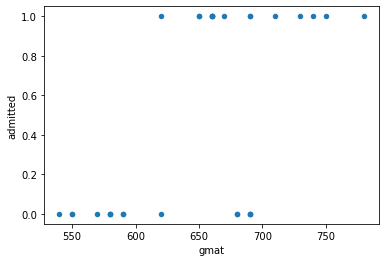

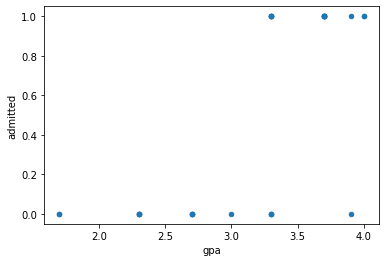

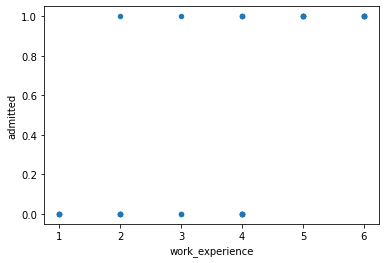

In [4]:
# Examine the data
ax=df.plot.scatter('gmat', 'admitted')
ax=df.plot.scatter('gpa', 'admitted')
ax=df.plot.scatter('work_experience', 'admitted')

In [35]:
# Build binary logistic model using one predicting variable
log_reg = sm.logit(formula='admitted~gpa', data=df).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.331992
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               admitted   No. Observations:                   30
Model:                          Logit   Df Residuals:                       28
Method:                           MLE   Df Model:                            1
Date:                Tue, 20 Jul 2021   Pseudo R-squ.:                  0.5210
Time:                        17:26:08   Log-Likelihood:                -9.9598
converged:                       True   LL-Null:                       -20.794
Covariance Type:            nonrobust   LLR p-value:                 3.239e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -16.2892      6.394     -2.548      0.011     -28.821      -3.757
gpa            4.9919      1.

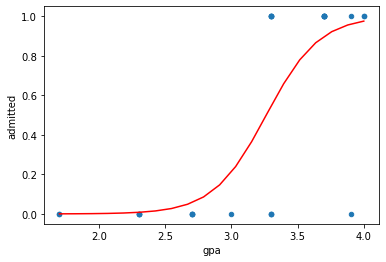

In [37]:
# Plot the logistic model
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm_api

value_min = df['gpa'].min()
value_max = df['gpa'].max()
pred_input = np.linspace(value_min, value_max, 20)

predictions=log_reg.predict(exog=dict(gpa=pred_input))
ax=df.plot.scatter('gpa', 'admitted')
plt.plot(pred_input,predictions,c='red')
plt.show()

In [41]:
# Accuracy analysis
from sklearn.metrics import (confusion_matrix, accuracy_score,f1_score,precision_score,recall_score)

predictions = log_reg.predict(df['gpa'])
predictions = list(map(round, predictions))

# confusion matrix
cm = confusion_matrix(df['admitted'], predictions) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(df['admitted'], predictions))
print('recall_score (sensitivity) = ', recall_score(df['admitted'], predictions)) # sensitivity
print('precision_score (specificity) = ', precision_score(df['admitted'], predictions)) # specificity

Confusion Matrix : 
 [[11  4]
 [ 0 15]]
Test accuracy =  0.8666666666666667
recall_score (sensitivity) =  1.0
precision_score (specificity) =  0.7894736842105263


In [43]:
# Multiple predicting variables
log_reg = sm.logit(formula='admitted~gmat+gpa+work_experience', data=df).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.247296
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               admitted   No. Observations:                   30
Model:                          Logit   Df Residuals:                       26
Method:                           MLE   Df Model:                            3
Date:                Tue, 20 Jul 2021   Pseudo R-squ.:                  0.6432
Time:                        17:29:48   Log-Likelihood:                -7.4189
converged:                       True   LL-Null:                       -20.794
Covariance Type:            nonrobust   LLR p-value:                 6.639e-06
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -16.3315      8.601     -1.899      0.058     -33.189       0.526
gmat          

In [44]:
# Multiple predicting variables
log_reg = sm.logit(formula='admitted~gpa+work_experience', data=df).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.247630
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               admitted   No. Observations:                   30
Model:                          Logit   Df Residuals:                       27
Method:                           MLE   Df Model:                            2
Date:                Tue, 20 Jul 2021   Pseudo R-squ.:                  0.6427
Time:                        17:30:12   Log-Likelihood:                -7.4289
converged:                       True   LL-Null:                       -20.794
Covariance Type:            nonrobust   LLR p-value:                 1.568e-06
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -15.5190      6.194     -2.505      0.012     -27.659      -3.379
gpa           

In [45]:
# Accuracy analysis
from sklearn.metrics import (confusion_matrix, accuracy_score,f1_score,precision_score,recall_score)

predictions = log_reg.predict(df[['gpa','work_experience']])
predictions = list(map(round, predictions))

# confusion matrix
cm = confusion_matrix(df['admitted'], predictions) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(df['admitted'], predictions))
print('recall_score (sensitivity) = ', recall_score(df['admitted'], predictions)) # sensitivity
print('precision_score (specificity) = ', precision_score(df['admitted'], predictions)) # specificity

Confusion Matrix : 
 [[13  2]
 [ 1 14]]
Test accuracy =  0.9
recall_score (sensitivity) =  0.9333333333333333
precision_score (specificity) =  0.875
